In [95]:
# First, I will import the libraries needed in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # This will adjust the configuration of the plots we will create

pd.options.mode.chained_assignment = None

# Now we will read in the data

df = pd.read_csv('/Users/meganschlebecker/Downloads/movies.csv')


In [96]:
# Let's take a quick peek at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# Now I will check for missing data

for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))



name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [92]:
# I will use dropna() to get rid of the small amount of null values by removing all rows

df.dropna(axis=0, how='any', thresh= None, subset= None, inplace= True)

# now I will check again 
for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [39]:
# Now I want to see the data types for each of the columns

df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           Int64
gross            Int64
company         object
runtime        float64
yearcorrect     object
dtype: object

In [89]:
# I will change the datatype in budget and gross column to int 64

df['budget'] = df['budget'].astype("Int64")

df['gross'] = df['gross'].astype("Int64")

In [97]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [26]:
# Looking through the data, the 'year' column and year within 'released' column do not always match
# Here I will make sure these match by creating a correct year column

df['yearcorrect'] = df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [71]:
# I am going to order the table by highest grossing

df=df.sort_values(by=['gross'], inplace=False, ascending=False)

In [30]:
# Changing the view options so I can scroll through all the data

pd.set_option('display.max_rows', None)

In [94]:
# Now, I will examine the data for duplicates and drop them

df.drop_duplicates()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [ ]:
# Now I will start to look at correlations related to the amount the movie grossed

# I first want to see the correlation between budget and then company, as I think those will have strong correlations



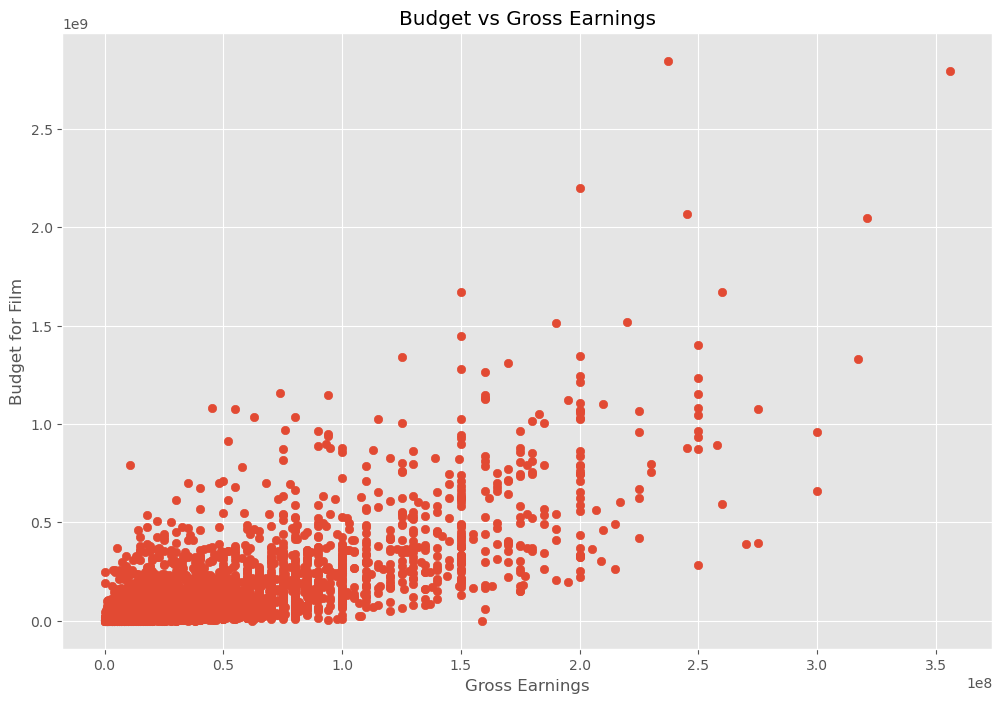

In [63]:
# This cell will run a scatter plot between gross revenue and budget

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
#ADD TRENDLINE?

plt.show()

In [98]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


<AxesSubplot:xlabel='budget', ylabel='gross'>

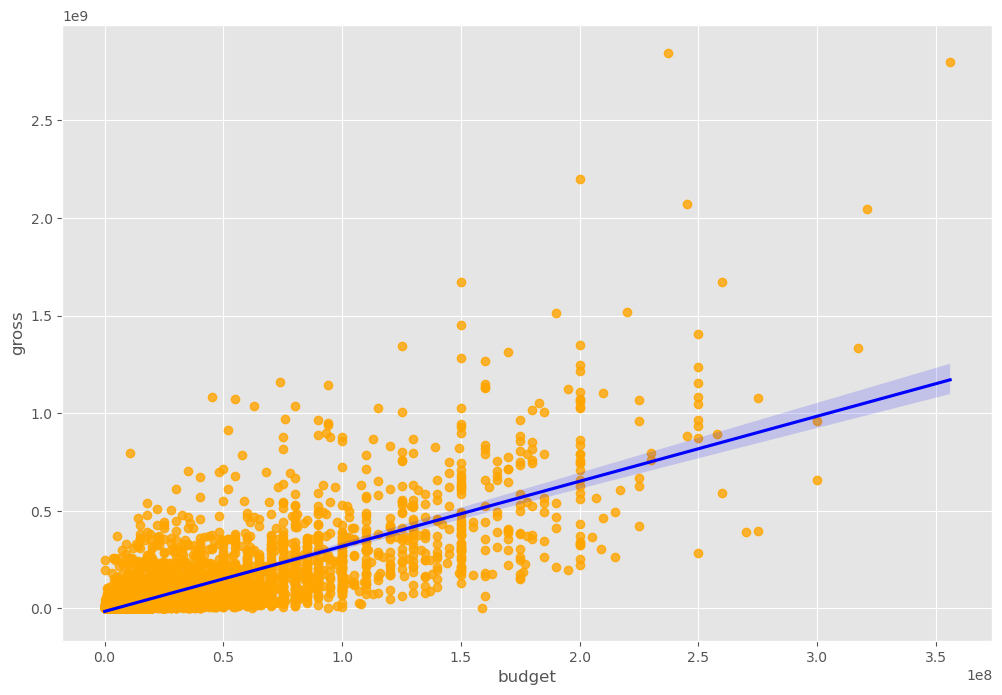

In [55]:
# Now I want to plot the budget vs gross using seaborn
# After some error messages, I realized that I needed to recast the columns as floats again

df['budget'] = df['budget'].astype("float64")

df['gross'] = df['gross'].astype("float64") # After some error messages, I realized that I needed to recast the columns as floats again


sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"orange"}, line_kws={"color":"blue"})


In [60]:
# Now to calculate the actual correlation values of all numerical fields

df.corr() #pearson #kendall #spearman 
df.corr(method="pearson")

#High correlation between budget and gross, my hypothesis was right

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


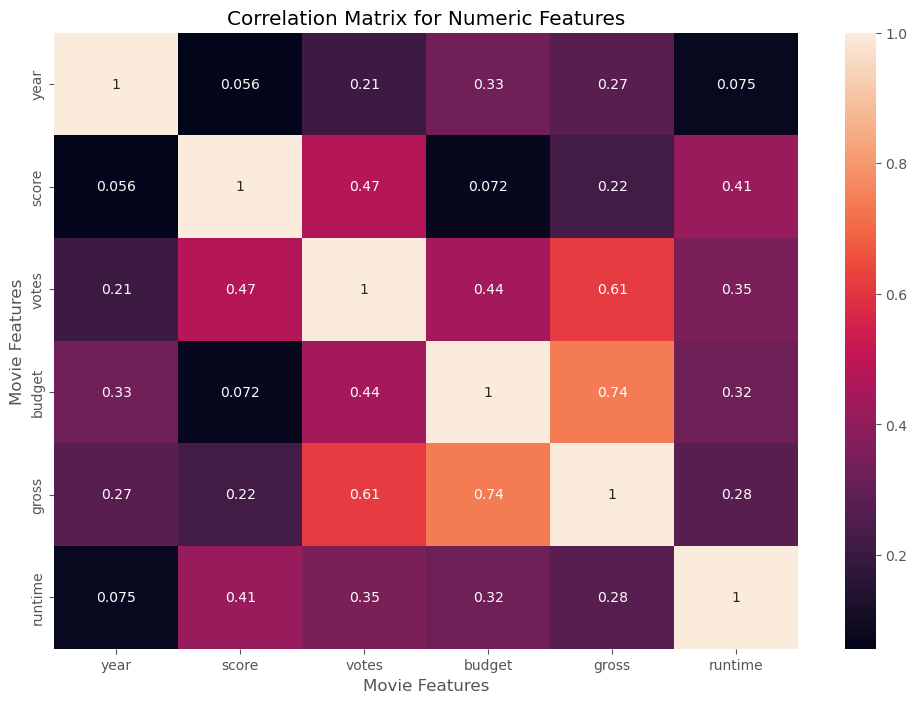

In [64]:
# So we want to make this more visualling appealing and easier to understand this correlation matrix

# First I will assign the correlation matrix to a name
correlation_matrix = df.corr(method="pearson")
# Then I will make it a heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [99]:
# Now we will move on to the correlation between gross earnings and the company
# We will have to create a numeric representation of the companies in order to do this
# We will numerize all the columns just to get it all out of the way

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [100]:
# To compare to original I reran the original cell with the cell ordering in order of highest grossing
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


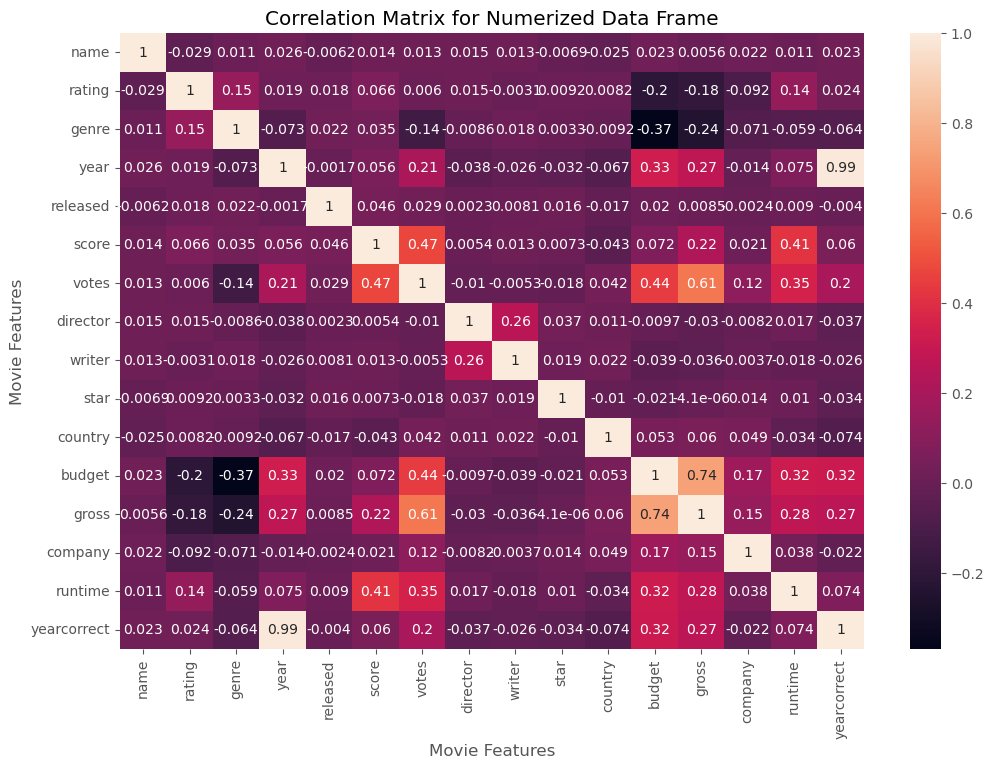

In [74]:
# Now we will make another correlation matrix for the new numerized data frame

correlation_matrix = df_numerized.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numerized Data Frame')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [101]:
# Now we will unstack a correlation table to see the highest correlating features quickly

# First we unstack the information on correlations
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head()



name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
dtype: float64

In [102]:
# Now we will create sorted pairs to visualize this quicker

sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()


budget  genre    -0.356564
genre   budget   -0.356564
        gross    -0.235650
gross   genre    -0.235650
rating  budget   -0.176002
dtype: float64

In [77]:
# Now I am limiting this to only correlations about 0.5 to see just the highest positive correlations

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        gross          0.614751
gross        votes          0.614751
budget       gross          0.740247
gross        budget         0.740247
yearcorrect  year           0.990417
year         yearcorrect    0.990417
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Company significance is not too high of a correlation
# However, vote and budget seem to have a high correlation

In [79]:
# This will show the negative correlations, or what might make your movie loss money in the box office
high_neg_corr = sorted_pairs[(sorted_pairs) < -0.1 ]

high_neg_corr

genre   budget   -0.368523
budget  genre    -0.368523
gross   genre    -0.244101
genre   gross    -0.244101
rating  budget   -0.203946
budget  rating   -0.203946
rating  gross    -0.181906
gross   rating   -0.181906
votes   genre    -0.135990
genre   votes    -0.135990
dtype: float64

In [ ]:
# From this we notice that there is high negative correlations between genre and rating

In [ ]:
# I am going to show the correlations in a bar graph between genre and gross to see which genres are the most impactful 

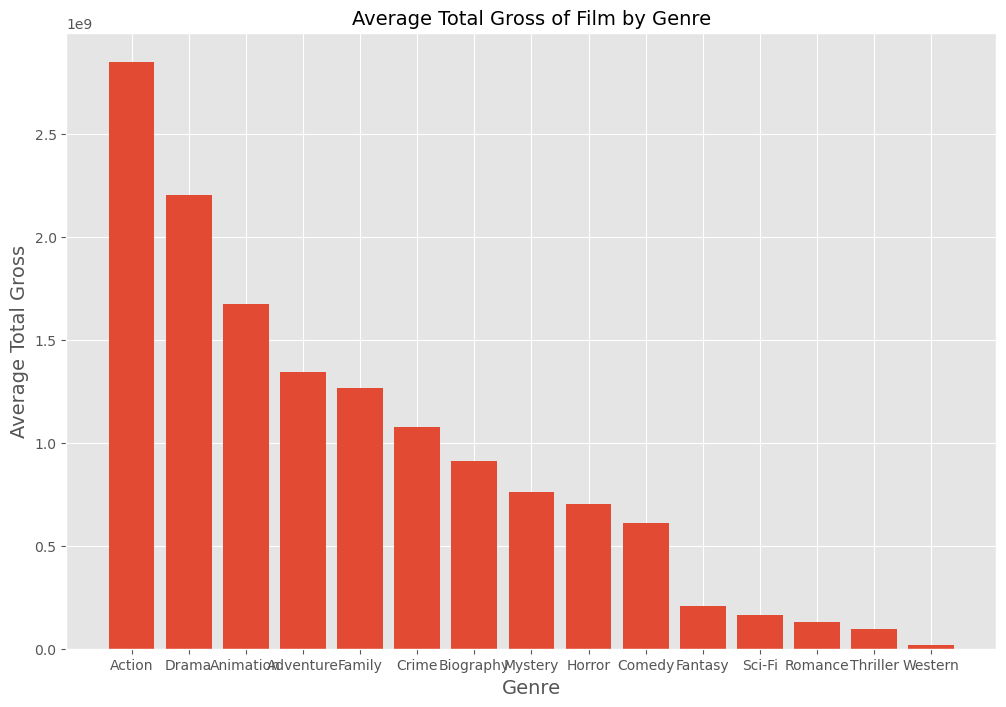

In [93]:
plt.bar(df['genre'], df['gross'])
plt.title('Average Total Gross of Film by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Total Gross', fontsize=14)
plt.grid(True)
plt.show()


In [ ]:
# The main takeaways from this correlation project is indicating the highest positive correlations for a high grossing film is the budget and votes! 
# Now, there are also negative correlations we may want to look at as well, which this project indicates genre and rating as negative correlations

